In [216]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('dataset\ltitanic_dataset.csv')
df.head()


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\kelvi\AppData\Local\Temp\ipykernel_5492\1389661612.py:4: SyntaxWarning: invalid escape sequence '\l'
  df=pd.read_csv('dataset\ltitanic_dataset.csv')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [218]:
for i in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']:
    df[i]=df[i].fillna(df[i].mode()[0])
    print(i, df[i].isnull().sum())

Survived 0
Pclass 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 0
Embarked 0


In [219]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Sex', 'Embarked']:
    df[i] = le.fit_transform(df[i])

check for outliers

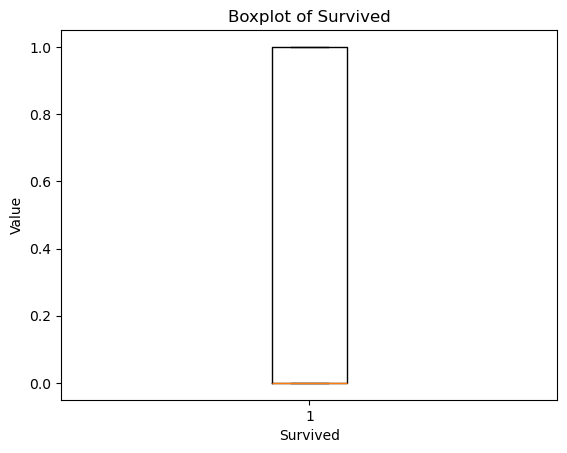

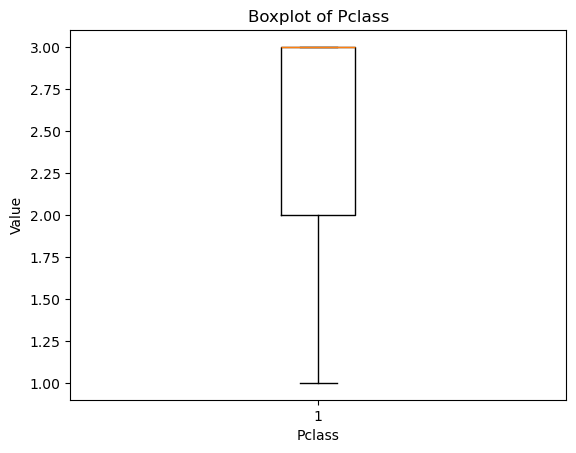

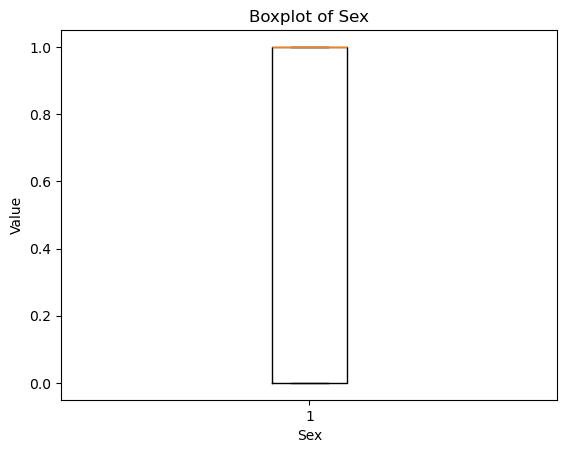

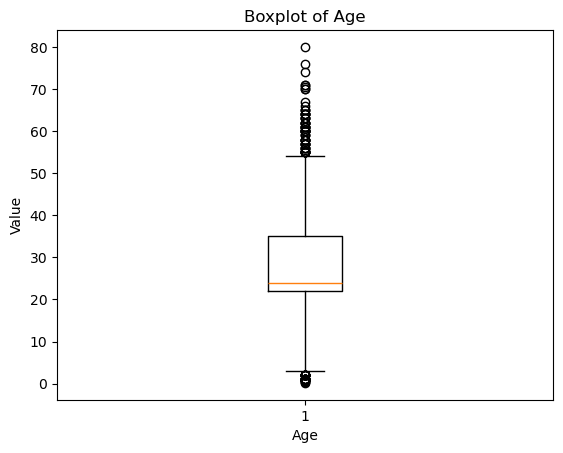

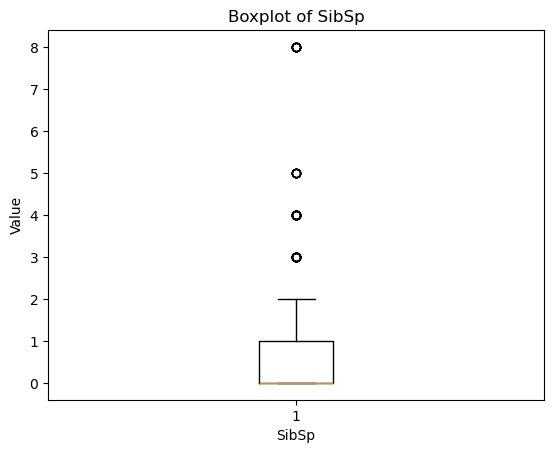

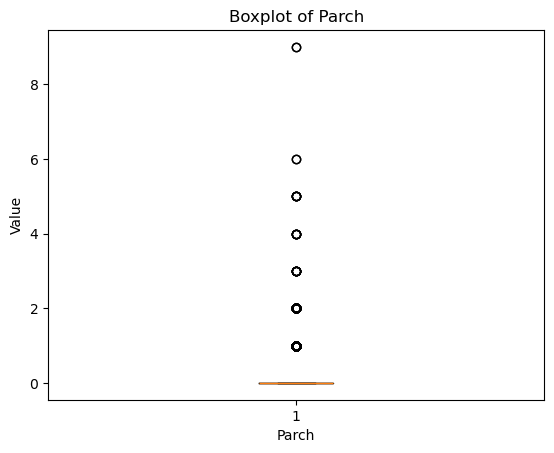

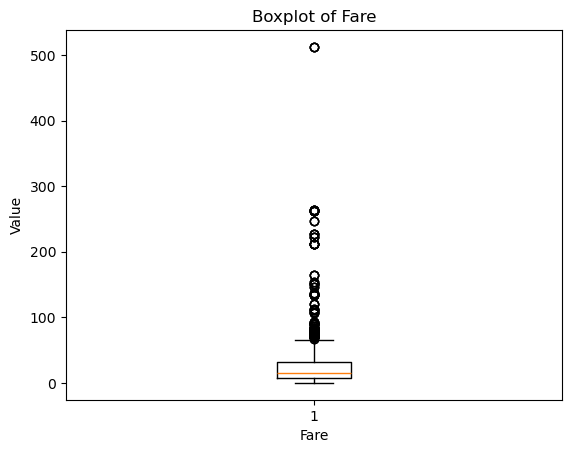

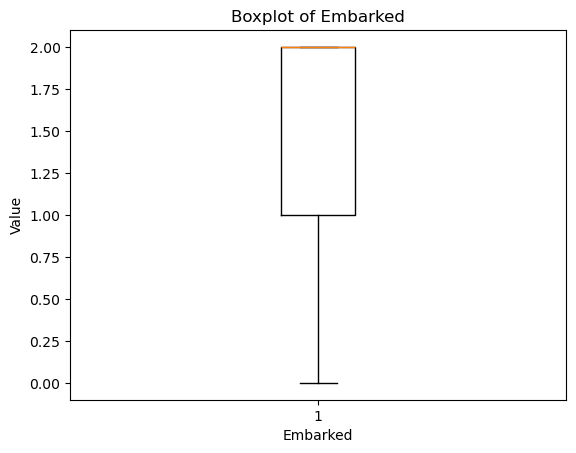

In [220]:
for i  in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {i}')
    plt.show()

In [221]:
df=df.drop(columns=['PassengerId','Name','Fare','Ticket'])

In [222]:
import scipy.stats as stats


In [223]:
for i in ['Age','SibSp','Parch']:

    z = np.abs(stats.zscore(df[i]))
    


    
    

In [224]:
from sklearn.preprocessing import StandardScaler
sl = StandardScaler()
for i in ['Age','SibSp','Parch']:
    df[i] = sl.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,-0.511722,0.481288,-0.445,C23 C25 C27,2
1,1,1,0,0.710389,0.481288,-0.445,C85,0
2,1,3,0,-0.206195,-0.479087,-0.445,C23 C25 C27,2
3,1,1,0,0.481243,0.481288,-0.445,C123,2
4,0,3,1,0.481243,-0.479087,-0.445,C23 C25 C27,2


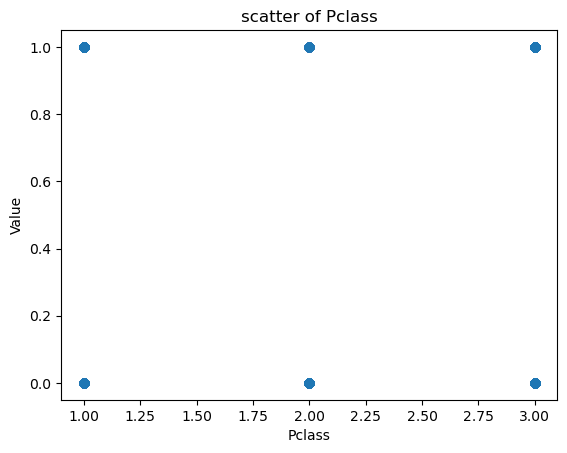

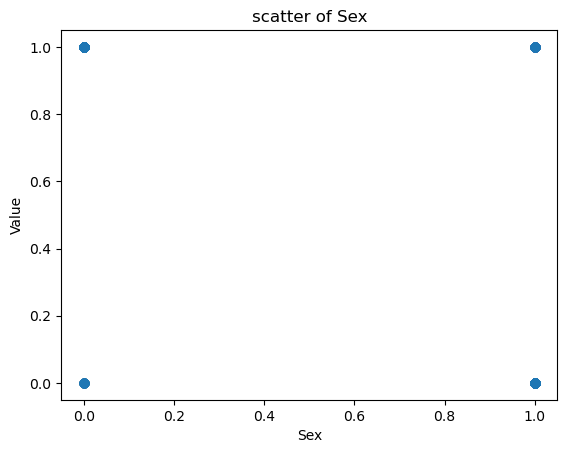

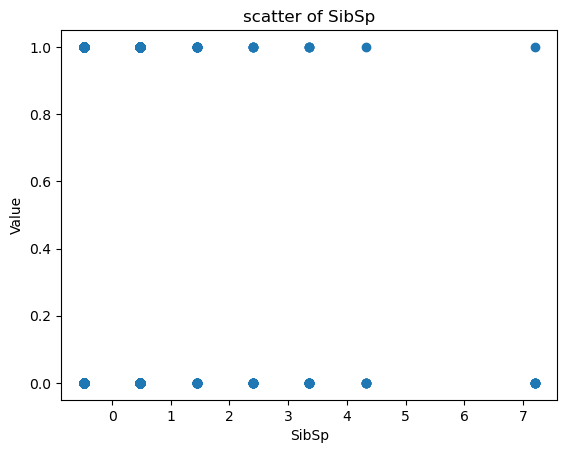

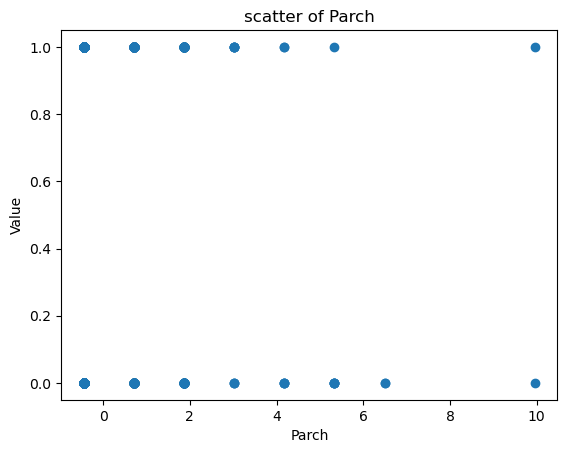

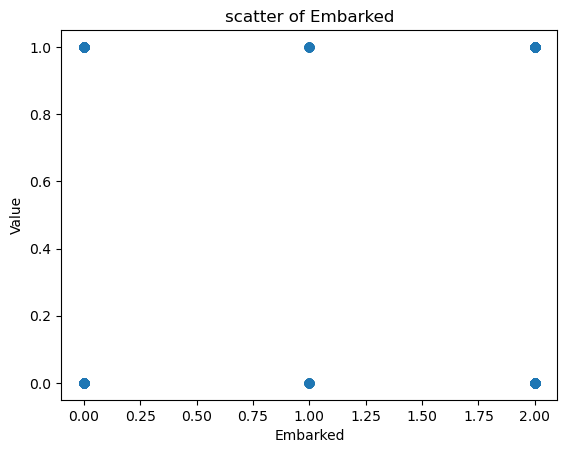

In [225]:
for i in ['Pclass','Sex','SibSp','Parch','Embarked']:
    plt.scatter(df[i],df['Survived'])
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.title(f'scatter of {i}')
    plt.show()

In [226]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [227]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

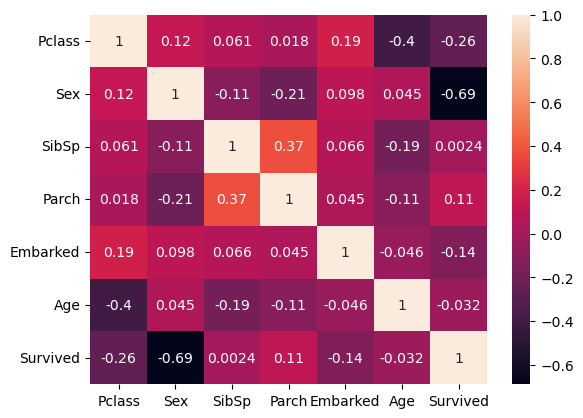

In [228]:
import seaborn as sns
corr_matrix = df[['Pclass','Sex','SibSp','Parch','Embarked','Age','Survived']].corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()


In [229]:
from sklearn.model_selection import train_test_split
x=pd.DataFrame(df,columns=['Pclass','Sex','SibSp','Parch','Embarked'])
y=df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
lr = LogisticRegression()
lr.fit(x_train,y_train)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [231]:
print('desicion tree score',dt.score(x_train,y_train))
print('logistic Regresion score',lr.score(x_train,y_train))

desicion tree score 0.8668122270742358
logistic Regresion score 0.8460698689956332


In [232]:
# y_pred = dt.predict(x_test)
# print("Linear Regression Model Accuracy: ", accuracy_score(y_test, y_pred))

In [233]:
from sklearn.metrics import accuracy_score,precision_score,roc_curve,confusion_matrix,roc_auc_score,f1_score

In [234]:
x_test.head()


,Pclass,Sex,SibSp,Parch,Embarked
1139,2,0,0.481288,-0.445000,2
533,3,0,-0.479087,1.866526,0
459,3,1,-0.479087,-0.445000,1
1150,3,1,-0.479087,-0.445000,2
393,1,0,0.481288,-0.445000,0


In [235]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
accuracy_score_lr = accuracy_score(y_test,y_pred_lr)
accuracy_score_dt = accuracy_score(y_test,y_pred_dt)
precision_score_lr = precision_score(y_test,y_pred_lr)
precision_score_dt = precision_score(y_test,y_pred_dt)
print("Accuracy of Logistic Regression: ", accuracy_score_lr)
print("Accuracy of Desision tree: ", accuracy_score_dt)
print("Precision of Logistic Regression: ", precision_score_lr)
print("Precision of Desision tree: ", precision_score_dt)

Accuracy of Logistic Regression:  0.8804071246819338
Accuracy of Desision tree:  0.8676844783715013
Precision of Logistic Regression:  0.8690476190476191
Precision of Desision tree:  0.8742138364779874


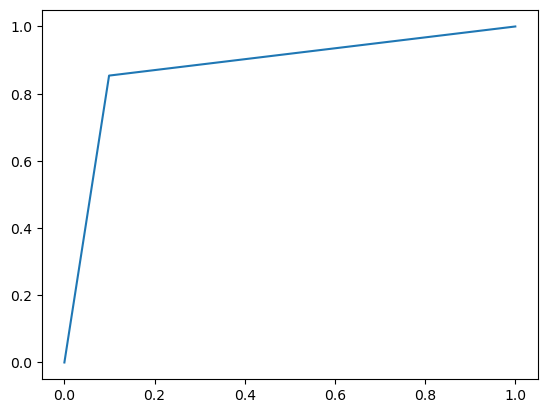

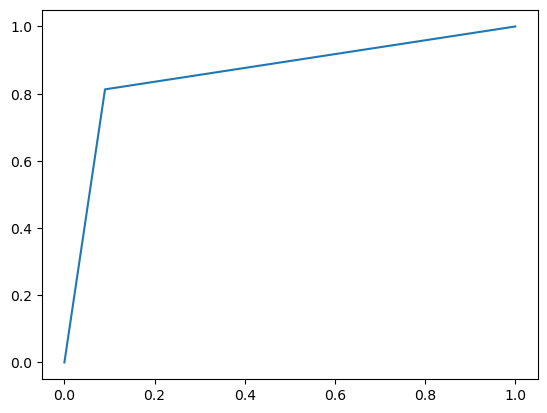

In [236]:
lr_roc_curve = roc_curve(y_test,y_pred_lr)
dt_roc_curve = roc_curve(y_test,y_pred_dt)

plt.plot(lr_roc_curve[0],lr_roc_curve[1])
plt.show()
plt.plot(dt_roc_curve[0],dt_roc_curve[1])
plt.show()

In [237]:
lr_confusion = confusion_matrix(y_test,y_pred_lr)
dt_confusion = confusion_matrix(y_test,y_pred_dt)

In [238]:
lr_confusion

array([[200,  22],
       [ 25, 146]], dtype=int64)

In [239]:
dt_confusion

array([[202,  20],
       [ 32, 139]], dtype=int64)

In [240]:
roc_auc_score_lr = roc_auc_score(y_test,y_pred_lr)
roc_auc_score_dt = roc_auc_score(y_test,y_pred_dt)
print("roc_auc_score of Logistic Regression: ", roc_auc_score_lr)
print("roc_auc_score of Desision tree: ", roc_auc_score_dt)

roc_auc_score of Logistic Regression:  0.8773510352457721
roc_auc_score of Desision tree:  0.8613877034929667


In [241]:
f1_score_lr = f1_score(y_test,y_pred_lr)
f1_score_dt = f1_score(y_test,y_pred_lr)
print("f1_score of Logistic Regression: ", f1_score_lr)
print("f1_score of Desision tree: ", f1_score_dt)

f1_score of Logistic Regression:  0.8613569321533924
f1_score of Desision tree:  0.8613569321533924


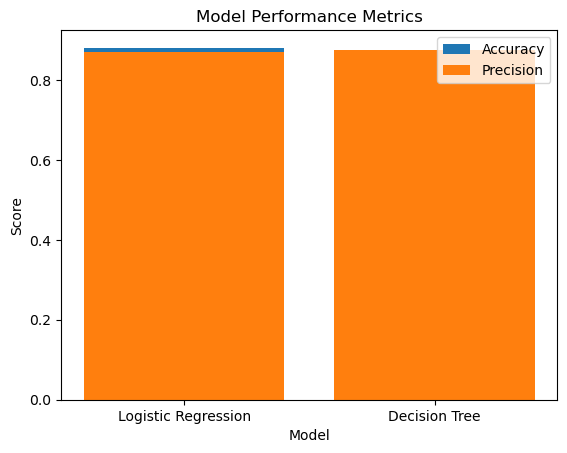

In [247]:
scores = {
    'Accuracy': [accuracy_score_lr, accuracy_score_dt],
    'Precision': [precision_score_lr, precision_score_dt]
}

labels = ['Logistic Regression', 'Decision Tree']

fig, ax = plt.subplots()

ax.bar(labels, scores['Accuracy'], label='Accuracy')
ax.bar(labels, scores['Precision'], label='Precision')

ax.set_title('Model Performance Metrics')
ax.set_xlabel('Model')
ax.set_ylabel('Score')

ax.legend()

plt.show()

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters